## Exercise sheet 8

Cüneyt Erem
3277992
s6cuerem@uni-bonn.de

Nkeh Victor Ndiwago
3504121
s0vinkeh@uni-bonn.de

Paula Romero Jiménez
3320220
s0parome@uni-bonn.de

--------------------------------

Exercise 1

Decision Trees (4P)

1) What does the Gini index measure? Calculate the Gini index (without coding) for all three cases. (2P)

 Gini index also known as Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is chosen at random. 

 Gini index run1=[1*(1-1) +0*(1-0)]*0.5 + [0*(1-0) + 1*(1-1)]*0.5 = 0 
 
 Gini index run2=[0.5*(1-0.5) + 0.5*(1-0.5)]*0.5 + [0.5*(1-0.5) + 0.5*(1-0.5)]*0.5 = 0.5
 
 
 Gini index run3=[1*(1-1) + 0*(1-0)]*0.5 + [1*(1-1) + 0*(1-0)]*0.5 = 0 

2. Explain the advantages and disadvantages of Decision Trees. What is a strategy to overcome the limitations? (2P)

Advantages:
    
   .clear visualization and interpretation:The algorithm is easy to understand,interpret and visualize as the idea is mostly used in our daily lives.
   
   .It can be used for both classification and regression problems.
   
   . It can handle both continuous and categorical variables.
   
   . No feature scaling is required(Standardization and Normalization):it uses the rule based approach instead of calculation.
   
   . decision trees automatically handle missing values and outliers.
   
Disadvantages:
   
   .Overfitting: This is the main problem of the decision tree and as a result leads to wrong predictions.inorder to fit the data(even noisy data), it keeps generating new nodesand as a result the tree becomes too complex to interpret, there by loosing its generalization ability.consequently it will perform very well on the trained data but starts making alot of mistakes on the unseen data.
   
   .Not suitable for large datasets:If data size is large, then one single tree may grow complex and lead to overfitting. in such situations Random Frest is recommended .
  
 Strategey to overcome limitation:
 
  .Inorder to overcome the limitations of tyhe decision tree tree, we use Random Forest which does not rely on a single tree. It creates a Forest of trees and takes the decision based on vote count. 

Exercise 2

Random Forests and Boosting (10P)

1. Explain in your own words, why random forests yield a variance reduction compared to a single  decision tree. (2P)

Random Forest uses fully grown decision trees with low bias and high variance. It reduces error by reducing variance. the trees are made uncorrelated to maximise  decrease in variance. in other words Bagging(averaging predictions from lots of trees) and Random Forest use these high variance models and aggregate them in order to reduce variance and enhance prediction accuracy. 

3) Below is a table to contrast three different methods. Replace the “?” in the Variance/Bias columns with “high” or “low” and give statistical explanations on each decision. (3P)

| Method     | Variance | Bias | Explanation |
| ----------- | ----------- | ----------- | ----------- |
| A single decision tree | high | low | A decision tree has low bias but high variance because it can easily change as small change in input variable.it does not generalize the pattern well. it works well only for the training data but leads to overfitting|
| A single decision tree vs. random forest | high vs. low | low vs. high |Bagging and Random Forest use these high variance models and aggregate them in order to reduce variance and enhance prediction accuracy. both Bagging and random forest use Bootstrap sampling which increases bias in the single tree.also the random forest limits the allowed variables to split at each node there by increasing bias for single random forest trees.to conclude if the increase in bias of of the single trees in bagging and RF is not outweighing the variance reduction then the prediction accuracy will increase. |
| A single decision tree vs. (gradient) boosted decision trees | high vs. low | high vs low | boosting reduces error by reducing bias and also Variance is reduced in gradient boosted decision trees by simply aggregating the output from many models. |

4. Differences between Random Forests and gradient boosting: (2P)

. In gradient boosting, training is done sequentially one tree at a time each new tree is built to improve on or correct the errors of the previous one while in Random Forest each decision treee is build and calculated independently.

.In Random Forest, the results of the decision trees are agreegated at the end of the process.while in Gradient Boosting, the results of each decision tree  are aggregated along the way to calculate the final result at the end of the process. 

 Which approach usually trains faster? Why?

Random Forest trains faster than gradient boosting,because it works only on a subset of features so it can easily work with hundreds of features .it is worth noting that Random Forest is good for high dimensional data.

 Which one is more prone to overfitting? Why?
 
  Gradient Boosting is more prone to overfitting,because when the depth of trees increases,the model is likely going to overfit the training data.Also increasing the number of gradient boosting iterations increases overfitting.

5. True or False for tree-based methods? Explain your answer. (3P) 
    

.Features need to be standardized?

   False, because they are not sensitive to Variance
   
.Only suited for continuous variables?

  False, Tree-based methods are suited both for categorical variables and continuous variables.the problem with continuous variables is that they can have more than one value, or a spectrum of values, and as a result in predictive analysis, calculations calcul;ations rapidly grow big and complex.
  
 .Deeper trees yield better ensemble models?
 
  True, because deeper trees reduces bias though another problem of large variance arises which is overcomed by Bagging(Bootstrap Aggregation)


--------------------------------

### Exercise 3

### Programming Task – Random Forest (8P)

In [1]:
import numpy as np
import pandas as pd

**1. Load the provided Cleveland subset onto your Notebook (file name: processed.cleveland_cleaned.data). Note that this dataset is prepared explicitly for this exercise and might differ from the original version. (1P)**

In [2]:
dataset = pd.read_csv('processed.cleveland_cleaned.data')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**2. Make the column “num” as the target variable and the rest of the columns as the input variables. Split the dataset into 80% train and 20% test sets using the Sklearn train_test_split() function. Set random_state for reproducibility. (1P)**

In [3]:
# Divide the dataframe into target and rest
features = dataset.drop(['num'], axis=1) 
target = dataset['num']

In [4]:
from sklearn.model_selection import train_test_split

# Divide the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=6)

**3. Define a random forest classifier. Define a 3-fold cross-validation for the dataset using the Sklearn KFold() function. Remember to enable order shuffling of the dataset. (1P)**

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Define the random forest classifier.
clf = RandomForestClassifier(random_state=6)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=6)

In [6]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6333333333333333


In [7]:
from sklearn.model_selection import KFold

# Define the KFold cross validation
cv = KFold(n_splits=3, random_state=6, shuffle=True)

**4. Perform grid search hyperparameter optimization on the random forest classifier using the training set with these hyperparameters ranges:**
- a. Number of estimators: 50, 100, 200, 500, 1000
- b. Criterion: gini, entropy
- c. Maximum tree depth: None, 10, 50

**Supply the grid search function with the defined estimator, hyperparameter ranges, and folds. Make “accuracy” as the scoring function. What is the best value for each hyperparameter? What is the best accuracy score obtained? (1P)**

In [8]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid  
param_grid = {
    'max_depth': [None, 10, 50],
    'n_estimators': [50, 100, 200, 500, 1000],
    'criterion': ['gini','entropy']
}

# Define the grid search CV
search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = cv, n_jobs = -1, verbose = 2, scoring='accuracy')

In [9]:
# Execute the search
result = search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [10]:
# Best value for each hyperparameter and best accuracy score
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.5822784810126582
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


--------------------------------

5. Taking the best values of hyperparameters from (4), get the cross-validation score of the random forest classifier using the Sklearn cross_val_score() function. What is the mean crossvalidated accuracy score? (1P)

In [16]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.570 (0.037)


6. Evaluate the trained model with test set using the Sklearn classification_report() function. Explain the difference between the accuracy and the f1-score. (1P)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        36
           1       0.00      0.00      0.00         9
           2       0.22      0.22      0.22         9
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.63        60
   macro avg       0.20      0.24      0.22        60
weighted avg       0.50      0.63      0.56        60



/home/cuneyt/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cuneyt/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cuneyt/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is 0.63, highest f1-score is element 0 with 0.88

F1 Score is the weighted average of Precision and Recall so it considers false positives and false negatives. Accuracy calculates a ratio of correctly predicted observation to the total observations. Therefore F1 is more useful than accuracy

Accuracy = TP+TN/TP+FP+FN+TN

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2*(Recall * Precision) / (Recall + Precision)



7. Obtain the feature importance of the model using the .feature_importance_ method of the model itself. Which feature contributes the most to the classification? (1P)

In [45]:
import time
import numpy as np

importances = clf.feature_importances_

mean = np.mean([tree.feature_importances_ for tree in clf.estimators_], axis=0)
print(mean, '\n')

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
print(std)

[0.10895828 0.02794171 0.06855011 0.09099511 0.1130698  0.01322721
 0.0326378  0.14667175 0.04251345 0.11917888 0.04691327 0.0995931
 0.08974954] 

[0.03524257 0.02085097 0.03828257 0.03193676 0.03931946 0.01229494
 0.01772846 0.05045822 0.0294863  0.04239955 0.02785394 0.03783187
 0.0466883 ]


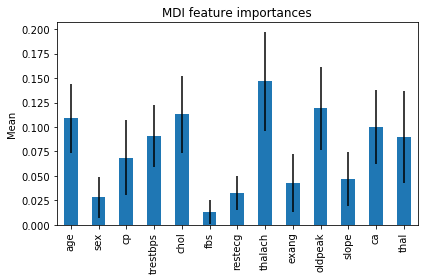

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=features.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("MDI feature importances")
ax.set_ylabel("Mean")
fig.tight_layout()

thalach has most higher importance value

8. Obtain feature importance of the model using the Sklearn permutation_importance() function. Set “repeat” to 10 times. Display the mean and standard deviation of each feature’s importance value. Do you notice any difference between the outcome of (7) and (8)? (1P)

In [42]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=0)

print(result.importances_mean)
print()
print(result.importances_std)

[0.03881857 0.01097046 0.05400844 0.01012658 0.01687764 0.00421941
 0.         0.05738397 0.02109705 0.04978903 0.02151899 0.08691983
 0.08649789]

[0.00901019 0.00506329 0.01144697 0.00206708 0.00730823 0.
 0.         0.00965867 0.00680359 0.00725935 0.00295359 0.00782584
 0.01182188]


mean and std values are more lower ın (8) than in (7)

---------------------------------